In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Cleaning city_data by dropping duplicate cities
city_data_clean = city_data.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
merge_data = pd.merge(ride_data,city_data_clean, on='city' )

# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

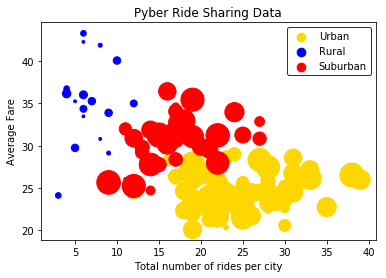

In [6]:
# Obtain the x and y coordinates for each of the three city types

# First let's determine the Average fare per city and type,
by_city = merge_data.groupby(["city","type"])
average_fare = by_city["fare"].mean().reset_index()
average_fare_by_type = average_fare.set_index('type')

# Also the Total number of rides per city
count_rides = by_city['ride_id'].count().reset_index()
count_rides_by_type = count_rides.set_index('type')

# Then the Total number of drivers
drivers = city_data_clean[["city","driver_count","type"]]
drivers_by_type = drivers.set_index('type')

#1.Now let's Plot Data for URBAN Cities
average_fare_urban = average_fare_by_type.loc["Urban"]
count_rides_urban = count_rides_by_type.loc["Urban"]
drivers_urban = drivers_by_type.loc["Urban"]
x_axis_urban = count_rides_urban['ride_id']
y_axis_urban = average_fare_urban['fare']
# Build the scatter plots for Urban
plt.scatter(x_axis_urban,y_axis_urban,color="Gold",s=drivers_urban['driver_count']*8,alpha=1.0,label="Urban")

#2.Let's Plot Data for RURAL Cities
average_fare_rural = average_fare_by_type.loc["Rural"]
count_rides_rural = count_rides_by_type.loc["Rural"]
drivers_rural = drivers_by_type.loc["Rural"]
x_axis_rural = count_rides_rural['ride_id']
y_axis_rural = average_fare_rural['fare']
# Build the scatter plots for Rural
plt.scatter(x_axis_rural,y_axis_rural,color="Blue",s=drivers_rural['driver_count']*8,alpha=1.0,label="Rural")

#3. let's Plot Data for SUBURBAN Cities
average_fare_suburban = average_fare_by_type.loc["Suburban"]
count_rides_suburban = count_rides_by_type.loc["Suburban"]
drivers_suburban = drivers_by_type.loc["Suburban"]
x_axis_suburban = count_rides_suburban['ride_id']
y_axis_suburban = average_fare_suburban['fare']
# Build the scatter plots for Subarban
plt.scatter(x_axis_suburban,y_axis_suburban,color="red",s=drivers_urban['driver_count']*8,alpha=1.0,label="Suburban")


# Incorporate the other graph properties
plt.xlabel("Total number of rides per city")
plt.ylabel("Average Fare")
plt.title("Pyber Ride Sharing Data")


# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Incorporate a text label regarding circle size

# Save Figure
plt.show()

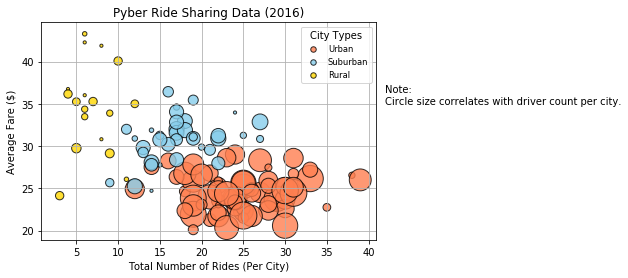

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

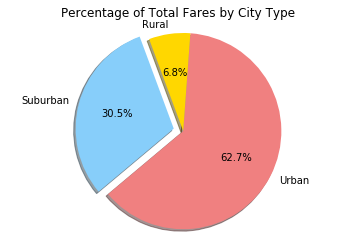

In [7]:
# First let's calculate the total fares
total_fares=merge_data["fare"].sum()
by_type = merge_data.groupby('type')
total_fares_by_type = by_type.sum().reset_index()
type_index = total_fares_by_type.set_index('type')

#Now let's calculate the percentages
urban_fare=type_index.loc[["Urban"],["fare"]]
percentage_urban_fare = ((urban_fare["fare"])/(total_fares)*100)

rural_fare=type_index.loc[["Rural"],["fare"]]
percentage_rural_fare = ((rural_fare["fare"])/(total_fares)*100)

suburban_fare=type_index.loc[["Suburban"],["fare"]]
percentage_suburban_fare = ((suburban_fare["fare"])/(total_fares)*100)

# Build Pie Chart
labels=["Urban","Rural","Suburban"]
sizes = [percentage_urban_fare,percentage_rural_fare,percentage_suburban_fare]
colors=["lightcoral","gold","lightskyblue"]
explode=(0,0,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True,startangle=220)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type")

plt.show()
# Save Figure


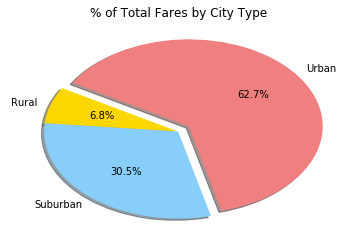

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

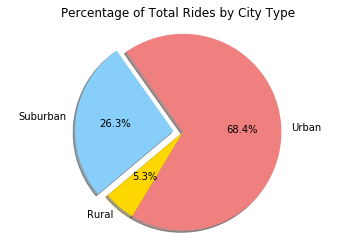

In [8]:
# Calculate Ride Percents
total_rides = merge_data["ride_id"].count()
total_rides_by_type = by_type.count().reset_index()
type_index_rider = total_rides_by_type.set_index('type')

urban_rides = type_index_rider.loc[["Urban"],["ride_id"]]
percentage_urban_rides=((urban_rides["ride_id"])/(total_rides)*100)

rural_rides = type_index_rider.loc[["Rural"],["ride_id"]]
percentage_rural_rides=((rural_rides["ride_id"])/(total_rides)*100)

suburban_rides = type_index_rider.loc[["Suburban"],["ride_id"]]
percentage_suburban_rides=((suburban_rides["ride_id"])/(total_rides)*100)

# Build Pie Chart
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_rides,percentage_urban_rides,percentage_suburban_rides]
colors=["gold","lightcoral","lightskyblue"]
explode=(0,0,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True,startangle=220)
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")

plt.show()

# Save Figure


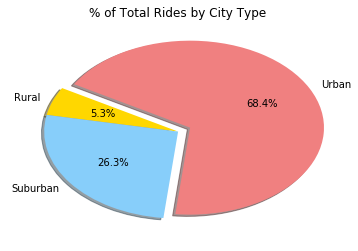

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

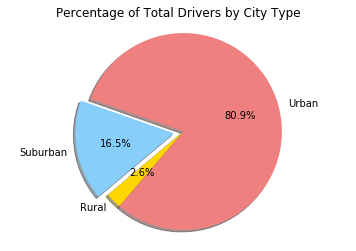

In [9]:
# Calculate Driver Percents
total_drivers = city_data_clean["driver_count"].sum()
by_type = city_data_clean.groupby('type')
total_drivers_by_type = by_type.sum().reset_index()
type_index = total_drivers_by_type.set_index('type')

urban_drivers = type_index.loc[["Urban"],["driver_count"]]
percentage_urban_drivers = ((urban_drivers["driver_count"])/(total_drivers)*100)

rural_drivers = type_index.loc[["Rural"],["driver_count"]]
percentage_rural_drivers = ((rural_drivers["driver_count"])/(total_drivers)*100)

suburban_drivers = type_index.loc[["Suburban"],["driver_count"]]
percentage_suburban_drivers = ((suburban_drivers["driver_count"])/(total_drivers)*100)

# Build Pie Charts
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_drivers,percentage_urban_drivers,percentage_suburban_drivers]
colors=["gold","lightcoral","lightskyblue"]
explode=(0,0,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True,startangle=220)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")

plt.show()




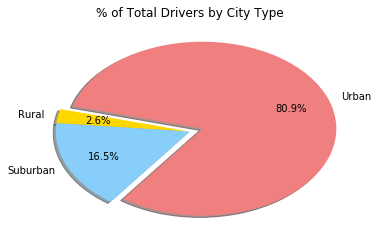

In [6]:
# Show Figure
plt.show()